<a href="https://colab.research.google.com/github/bpizarrogalleguillos/aed/blob/main/Copia_de_2022_2_CC3001_SesionActiva_GrafoDeHanoi_Barbay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 2022-2 - Sesion Activa: Grafo de Hanoi -- NOMBRE DEL ALUMNO

---






En esta sesión, ustedes programarán una función para visualizar el grafo de los estados de una torre de Hanoi con $n$ discos.

Al terminar la tarea exitosamente, usted debería 
1. entender la complejidad de las soluciones optimas al problema de la torre de Hanoi;
1. saber programar funciones recursivas; y 
1. estar familiarizado con librerias graficas de Python.


---

Más específicamente, dado un entero $n$, se pide
1. analizar matematicamente la cantidad de estados y de aristas del grafo de estado de una torre de Hanoi de $n$ discos con $3$ pilares;
1. programar un metodo para generar el grafo de todos los estados y movimientos legales de una torre de Hanoi de $n$ discos con $3$ pilares;
1. usar su metodo para generar tales grafos para $n\in\{1,2,3,4,5,6,7\}$ y 
1. comentar sobre el tiempo de ejecución observado de su metodo, y sobre la complejidad computacional de tal metodo.

Para realizar la sesión, deben hacer una copia de este archivo/colab, reemplazar `Nombre del alumno` por su nombre en el nombre del archivo y título del documento, y llenar los vacíos con sus explicaciones, sus implementaciones y sus pruebas para las funciones pedidas.


---
# Preámbulo

Python tiene varias librerias que permiten de dibujar grafos, con aristas orientadas (grafos dirigidos) o no orientadas (grafos no-dirigidos). En este tarea, usaremos la adaptación python de la libraria "GraphViz". La libreria (disponible para muchos languajes de programación) esta documentada en https://graphviz.org/docs, pero listamos aqui todas las funcionalidades que necesitaran para este tarea.

In [ ]:
import graphviz
from IPython.display import display_svg, SVG,display

Aqui hay un ejemplo de como dibujar un grafo no dirigido representando los 3 estados de una torre de Hanoi con 1 solo disco, y 3 pilares 'A', 'B' y 'C': la letra de cada estado indica la posición del disco, y la etiqueta "1" en cada arista indica que se mueve ese único disco.

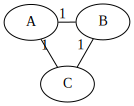

In [ ]:
h1 = graphviz.Graph(engine="neato",format="svg")
h1.edge("A","B","1")
h1.edge("A","C","1")
h1.edge("B","C","1")
svg = h1.pipe().decode('utf-8')
SVG(svg)


Aqui esta un ejemplo de como dibujar el grafo no dirigido representando los $3^2=9$ estados de una torre de Hanoi con 2 discos, y 3 pilares  'A', 'B' y 'C': cada estado consiste en una lista de 2 letras, la primera indicando la posicion del disco mas grande, la segunda indicando la posicion del disco mas pequeño. La etiqueta de cada arista indica cual disco se mueve, donde "1" es cuando se mueve el disco más grande y "2" es cuando se mueve el disco más pequeño.

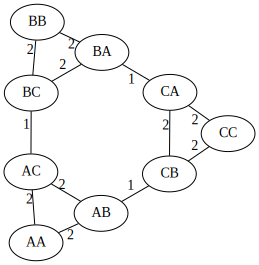

In [ ]:
h2 = graphviz.Graph(engine="neato",format="svg")
h2.edge("AA","AB","2")
h2.edge("AA","AC","2")
h2.edge("AB","AC","2")
h2.edge("AB","CB","1")
h2.edge("BA","BB","2")
h2.edge("BA","BC","2")
h2.edge("BB","BC","2")
h2.edge("BA","CA","1")
h2.edge("CA","CB","2")
h2.edge("CA","CC","2")
h2.edge("CB","CC","2")
h2.edge("AC","BC","1")
svg = h2.pipe().decode('utf-8')
SVG(svg)

Observe que el disco mas grande (cuya posicion esta indicada por la primera letra del estado) NO se puede mover cuando el disco pequeño esta encima: por eso no hay arista entre, por ejemplo, "AA" y "BA" o "CA" y "AA".

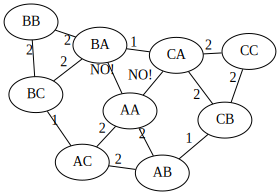

In [ ]:
h_malo = h2.copy()
h_malo.edge("AA","BA","NO!")
h_malo.edge("AA","CA","NO!")
svg = h_malo.pipe().decode('utf-8')
SVG(svg)

Observan tambien que la cantidad de estados augmentaron de $3$ para un solo disco a $9$ para $2$ discos, y la cantidad de aristas de $3$ a $12$. A continuación calcularan cuantos estados y aristas tiene el grafo de estado de una torre de Hanoi con $n$ discos.

---
# Ejercicios:

## Ejercicio 1: cantidad de nodos y de aristas por $n$ discos

Calculan la cantidad de **nodos** y de **aristas** del grafo de estado de una torre de Hanoi con $n$ discos y $3$ pilares. Pueden ayudarse de codigo para verificar experimentalmente su respuesta, pero se pide la formula algebraica exacta, y la justificación de tal formula, para ambos.

### Ejemplo de Solución

El grafo de estado de una torre de Hanoi con $n$ discos y $3$ pilares tendra $3^n$ estados, porque cada disco puede estar en cualquiera de los $3$ pilares.


Sea $A(n)$ la cantidad de aristas del grafo de estado de una torre de Hanoi con $n$ discos y $3$ pilares. Podemos definir su valor recursivamente:
- $A(0)=0$
- ($A(1)=3$)
- $A(n)= 3\times A(n-1) + 3$

Los valores de $A(n)$ formal una [seria geometrica](https://es.wikipedia.org/wiki/Serie_geom%C3%A9trica) de razón $q=3$, y de primero termino $A(0)=0$:
- $A(1) = 3$
- $A(2) = 3^2+3 = 12$
- $A(3) = 3^3+3^2+3 = 39$
- $A(4) = 3^4+3^3+3^2+3 = 120$
- ...

El valor de $A(n)$ esta dado por la formula
Podemos verificar que, por $n=2$, tal formula da $12$.

## Ejercicio 2: método generando el grafo por $n$ discos

Complete la implementación del metodo `hanoi_state_graph` que genera el grafo de estado de una torre de Hanoi de $n$ discos con $3$ pilares, etiquetando cada arista con el disco movido, donde "1" es el movimiento del disco mas grande y "$n$" es el movimiento del disco más pequeño. 

In [ ]:
def hanoi_state_graph(n,graph,prefix=""):
  if n ==1 :
    graph.edge(prefix+"A",prefix+"C",str(n))
    graph.edge(prefix+"A",prefix+"B",str(n))
    graph.edge(prefix+"B",prefix+"C",str(n))
  else:
    print("Eso no esta implementado aun!")

Eso deberia permitirlos de dibujar no solamente tal grafo por un disco:

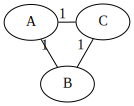

In [ ]:
h1 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(1,h1)
svg = h1.pipe().decode('utf-8')
SVG(svg)

Pero tambien para cantidades de discos mas grandes:

In [ ]:
h2 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(2,h2)
svg = h2.pipe().decode('utf-8')
SVG(svg)

Eso no esta implementado aun!


### Hints

1. La secuencia de letras que representa el estado donde $n$ discos estan en el pilar "A" se puede generar con el codigo `"A"*n`.
2. El parametro `prefix` puede ser usado para, recursivamente, agregar un prefijo a **todos** los estados manipulados por la función recursiva.

### Ejemplo de Solución

In [ ]:
def hanoi_state_graph(n,graph,prefix=""):
  if n >0 :
    hanoi_state_graph(n-1,graph,prefix+"A")
    hanoi_state_graph(n-1,graph,prefix+"B")
    hanoi_state_graph(n-1,graph,prefix+"C")
    graph.edge(prefix+"A"+"B"*(n-1),prefix+"C"+"B"*(n-1),str(n))
    graph.edge(prefix+"A"+"C"*(n-1),prefix+"B"+"C"*(n-1),str(n))
    graph.edge(prefix+"B"+"A"*(n-1),prefix+"C"+"A"*(n-1),str(n))

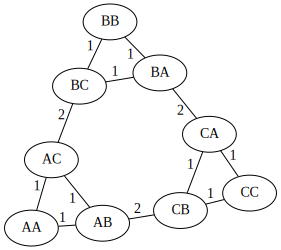

In [ ]:
h2 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(2,h2)
svg = h2.pipe().decode('utf-8')
SVG(svg)

## Ejercicio 3: grafos por $n\in\{1,2,3,4,5,6,7\}$ discos

Use su metodo para dibujar los grafos de estados de las torres de Hanoi con $n\in\{1,2,3,4,5,6,7\}$ discos (verificando que su grafo es equivalente a los ejemplos del preámbulo para $n\in\{1,2\}$).

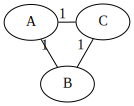

In [ ]:
h1 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(1,h1)
svg = h1.pipe().decode('utf-8')
SVG(svg)

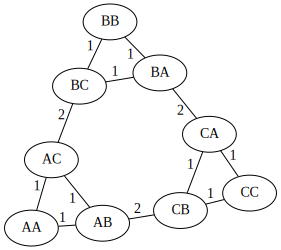

In [ ]:
h2 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(2,h2)
svg = h2.pipe().decode('utf-8')
SVG(svg)

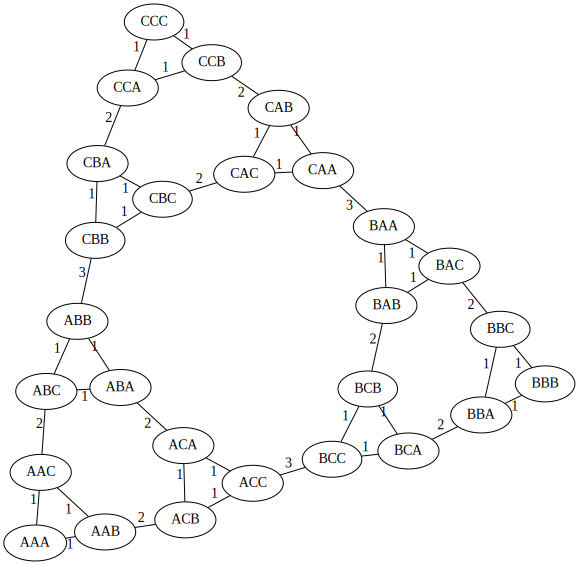

In [ ]:
h3 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(3,h3)
svg = h3.pipe().decode('utf-8')
SVG(svg)

### Ejemplo de Solución

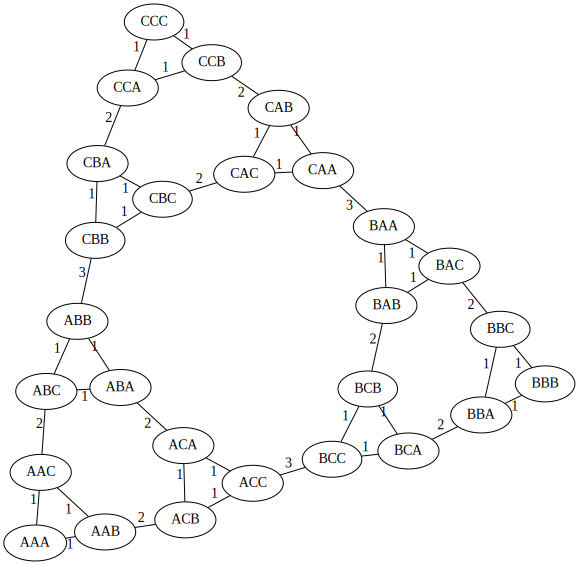

In [ ]:
h3 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(3,h3)
svg = h3.pipe().decode('utf-8')
SVG(svg)

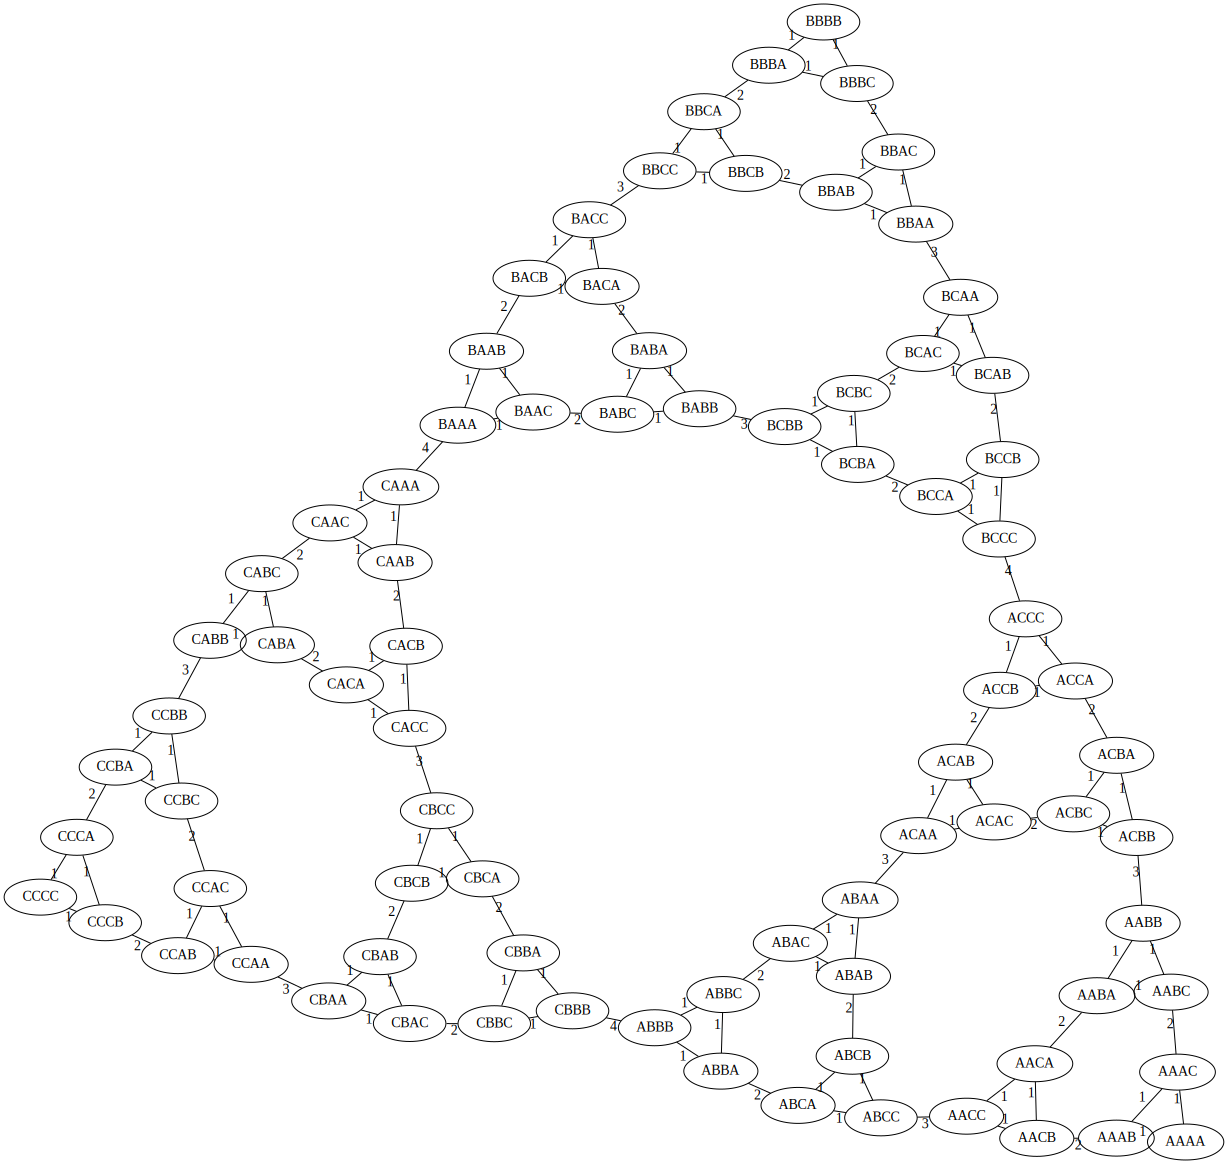

In [ ]:
h4 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(4,h4)
svg = h4.pipe().decode('utf-8')
SVG(svg)

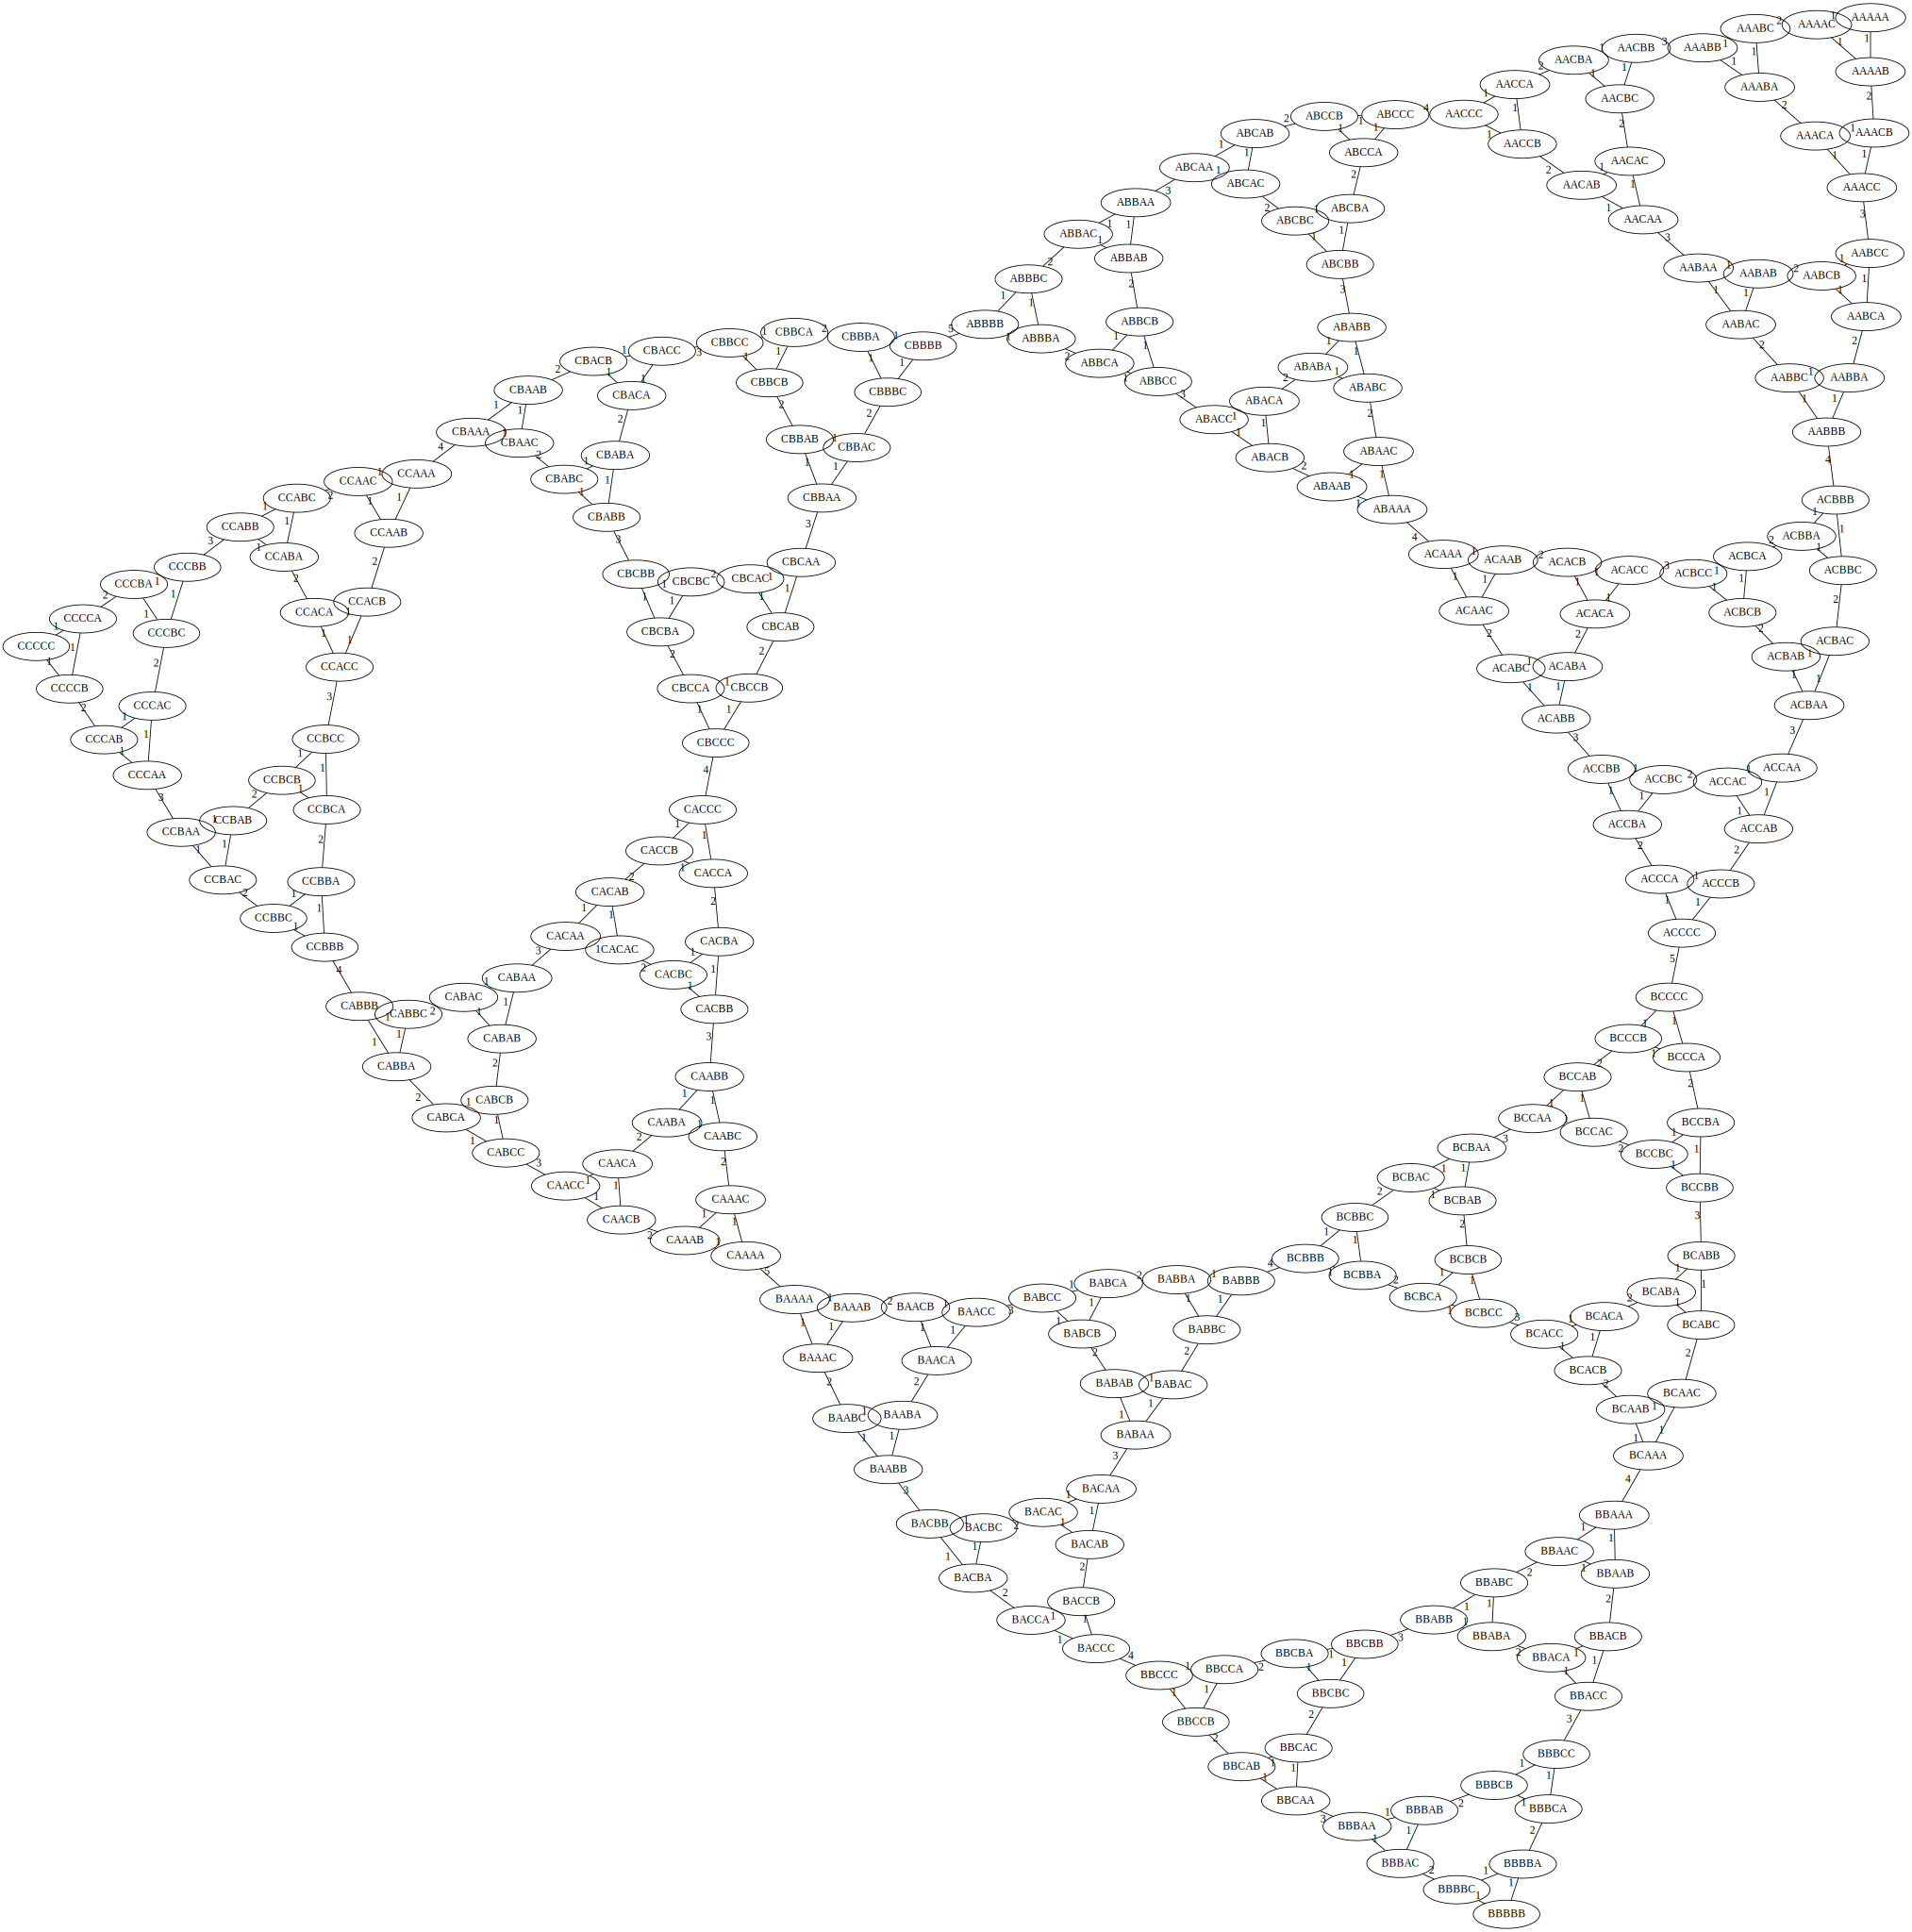

In [ ]:
h5 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(5,h5)
svg = h5.pipe().decode('utf-8')
SVG(svg)

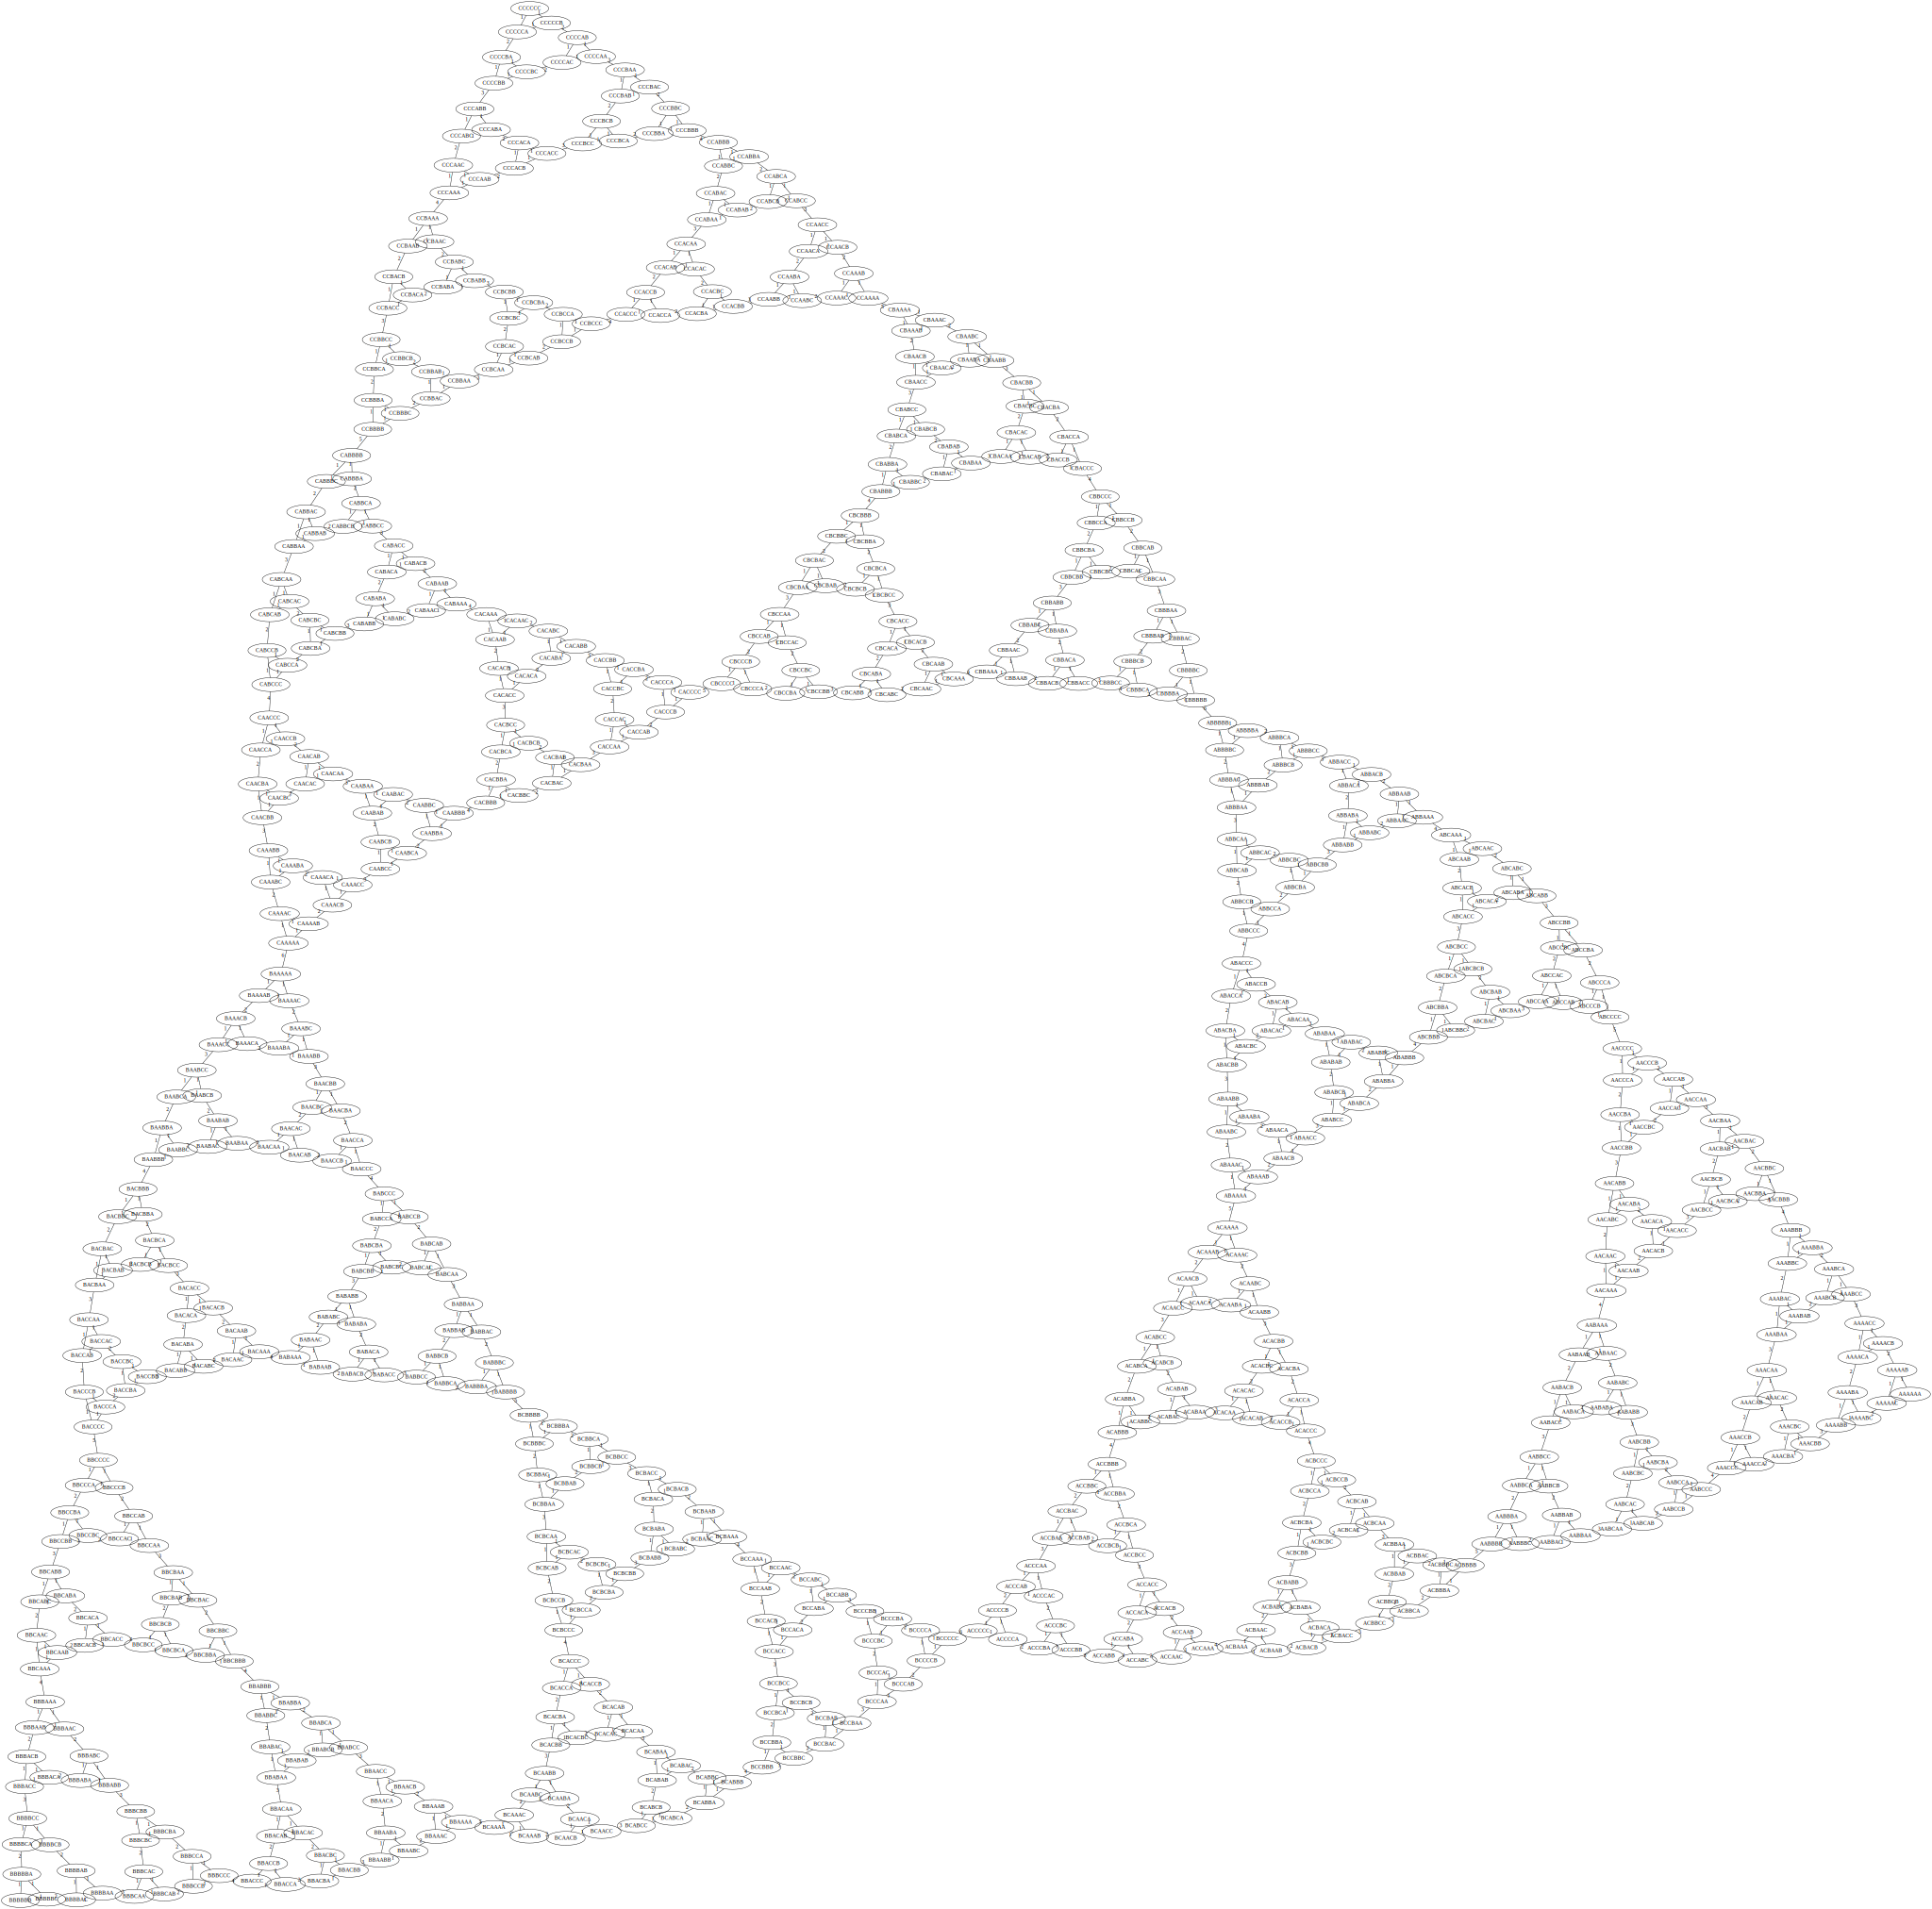

In [ ]:
h6 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(6,h6)
svg = h6.pipe().decode('utf-8')
SVG(svg)

In [ ]:
h7 = graphviz.Graph(engine="neato",format="svg")
hanoi_state_graph(7,h7)
svg = h7.pipe().decode('utf-8')
SVG(svg)

## Ejercicio 4: complejidad de su método

¿Qué observan sobre el tiempo de calculo de cada grafo? Analice matematicamente el orden asintotico de la complejidad  de su método en función de la cantidad $n$ de discos de la torre de Hanoi.

### Ejemplo de Solución

### Tiempo de calculo de cada grafo:

- Ya el grafo para $n=5$ no se puede leer: es demasiado grande!
- El grafo para $n=7$ se demora notablemente mas para calcularse.

No deberia ser una sorpresa, dado que ya calculamos en la primera pregunta que la cantidad de nodos y de aristas aumentan exponencialmente con $n$.

### Orden Asintotico de la complejidad:

Uno puede ver que la complejidad del metodo recursivo que genera el grafo es 
- LINEAL en la cantidad $A(n)$ de aristas (se agregan 3 aristas a cada llamada), por lo cual es
- EXPONENCIAL en la cantidad $n$ de discos, o sea,
- el orden asintotico de la complejidad de calcular el grafo de estados de una torre de Hanoi de $n$ discos con 3 pilares esta a dentro de $\Theta(3^n)$, dado que 
   - Tal grafo tiene $3^n$ estados, existe una cota inferior a dentro de $\Omega(3^n)$ sobre la complejidad de calcularlo; y 
   - la complejidad de calcularlo esta a dentro de $O(3^n)$, porque hay $3^n$ llamadas recursivas que se ejecutan en tiempo constante (i.e. a dentro de $O(1)$).

## Ejercicio 5: complejidad y optimalidad de la solución al problema de la torre de Hanoi

¿A qué corresponde una solución al problema de la torre de Hanoi en el grafo de estado que calcularon? En particular, ¿a qué corresponde el tamaño de la secuencia de movimientos resolviendo optimamente el problema de la torre de Hanoi en el grafo?

### Ejemplo de solución

El problema de la torre de Hanoi con $n$ discos y $3$ pilares consiste en mover una torre de $n$ discos desde un pilar `A` a un pilar `C` usando el pilar `B` como "pivote". Cada solución al problema corresponde a un camino en el grafo de estados entre el estado `A...A` y el estado `C...C`.

El tamaño de la secuencia minima para el problema es la lina derecha entre `A...A` y `C...C`, porque la mas corta. Tiene tamaño $2^n-1$, lo que muestra lo optimo de la solución recursiva entregada en las apuntes.

---
# Para los curiosos

## Representación de Grafos DIRIGIDOS

In [ ]:
import graphviz
from IPython.display import display_svg, SVG,display

¡Uno no esta limitado a grafos no dirigidos! 
Aqui hay un ejemplo de grafo dirigido:

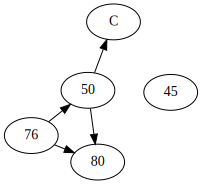

In [ ]:
dot = graphviz.Digraph(engine="neato")
dot.node('45')
dot.node('A', '76')
dot.node('B', '50')
dot.node('L', '80')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot.edge("B","C")
dot.format = 'svg'
svg = dot.pipe().decode('utf-8')
SVG(svg)

## Otros motores de representación

Pueden experimentar con varios motores de representación de grafos, documentados en https://graphviz.org/docs/layouts/

In [ ]:
dot = graphviz.Graph()
dot.node('45')
dot.node('A', '76')
dot.node('B', '50')
dot.node('L', '80')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot.edge("B","C")
dot.format = 'svg'

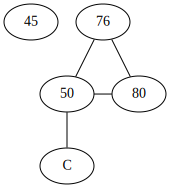

In [ ]:
dot.engine="dot"
svg = dot.pipe().decode('utf-8')
SVG(svg)

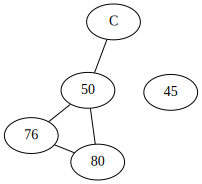

In [ ]:
dot.engine="neato"
svg = dot.pipe().decode('utf-8')
SVG(svg)

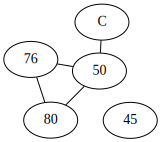

In [ ]:
dot.engine="fdp"
svg = dot.pipe().decode('utf-8')
SVG(svg)

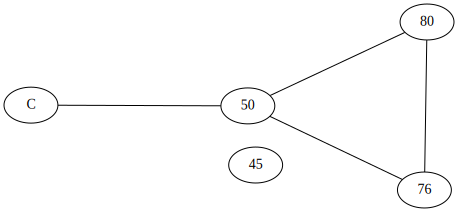

In [ ]:
dot.engine="sfdp"
svg = dot.pipe().decode('utf-8')
SVG(svg)

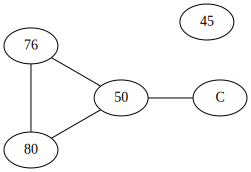

In [ ]:
dot.engine="circo"
svg = dot.pipe().decode('utf-8')
SVG(svg)

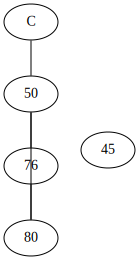

In [ ]:
dot.engine="twopi"
svg = dot.pipe().decode('utf-8')
SVG(svg)

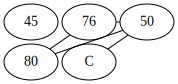

In [ ]:
dot.engine="osage"
svg = dot.pipe().decode('utf-8')
SVG(svg)

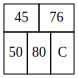

In [ ]:
dot.engine="patchwork"
svg = dot.pipe().decode('utf-8')
SVG(svg)

## Representación de los grafos de estado de Hanoi con el motor "sfdp"

El motor "sfdp" ("Scalable Force Directed Placement"), introducido en 2005 esta documentado en https://graphviz.org/docs/layouts/sfdp/


En los ejemplos basicos, no cambia mucho en comparación con el motor "neato":

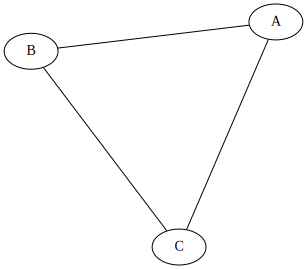

In [ ]:
h1 = graphviz.Graph(engine="sfdp")
h1.edge("A","B")
h1.edge("A","C")
h1.edge("B","C")
h1.format = 'svg'
svg = h1.pipe().decode('utf-8')
SVG(svg)

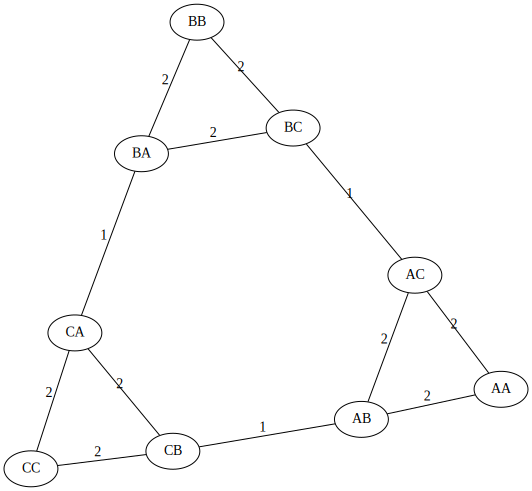

In [ ]:
h2 = graphviz.Graph(engine="sfdp")
h2.edge("AA","AB","2")
h2.edge("AA","AC","2")
h2.edge("AB","AC","2")
h2.edge("AB","CB","1")
h2.edge("BA","BB","2")
h2.edge("BA","BC","2")
h2.edge("BB","BC","2")
h2.edge("BA","CA","1")
h2.edge("CA","CB","2")
h2.edge("CA","CC","2")
h2.edge("CB","CC","2")
h2.edge("AC","BC","1")
h2.format = 'svg'
svg = h2.pipe().decode('utf-8')
SVG(svg)

Pero deberian probar representar sus grafos con numeros de discos mas grande: los dibujos para $n=6$ y $n=7$ ya son super "chistosos" :)

### Ejemplo de Solucion

In [ ]:
def hanoi_state_graph(n,graph,prefix=""):
  if n >0 :
    hanoi_state_graph(n-1,graph,prefix+"A")
    hanoi_state_graph(n-1,graph,prefix+"B")
    hanoi_state_graph(n-1,graph,prefix+"C")
    graph.edge(prefix+"A"+"B"*(n-1),prefix+"C"+"B"*(n-1),str(n))
    graph.edge(prefix+"A"+"C"*(n-1),prefix+"B"+"C"*(n-1),str(n))
    graph.edge(prefix+"B"+"A"*(n-1),prefix+"C"+"A"*(n-1),str(n))

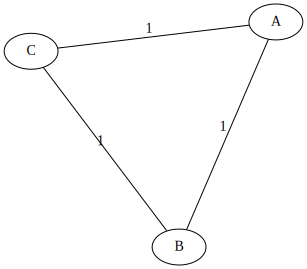

In [ ]:
h1 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(1,h1)
h1.format = 'svg'
svg = h1.pipe().decode('utf-8')
SVG(svg)

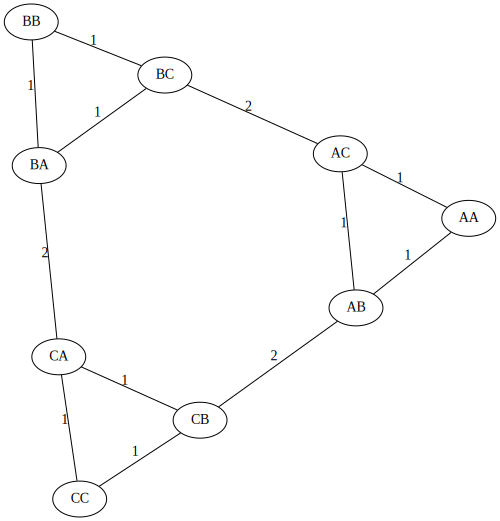

In [ ]:
h2 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(2,h2)
h2.format = 'svg'
svg = h2.pipe().decode('utf-8')
SVG(svg)

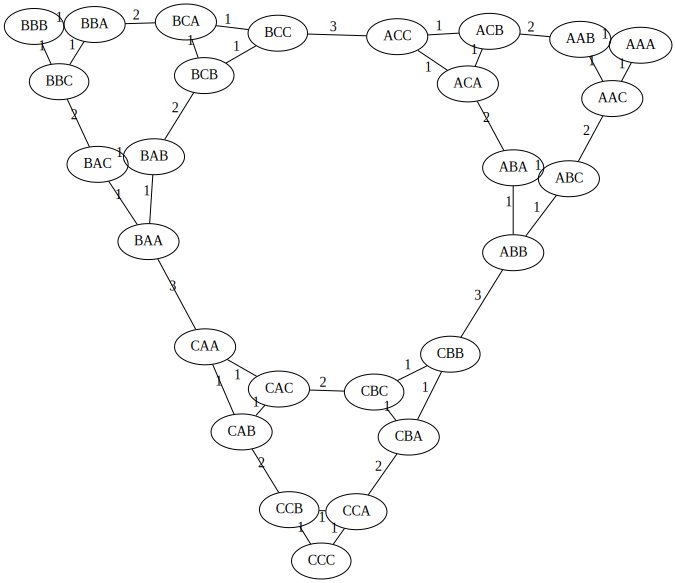

In [ ]:
h3 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(3,h3)
h3.format = 'svg'
svg = h3.pipe().decode('utf-8')
SVG(svg)

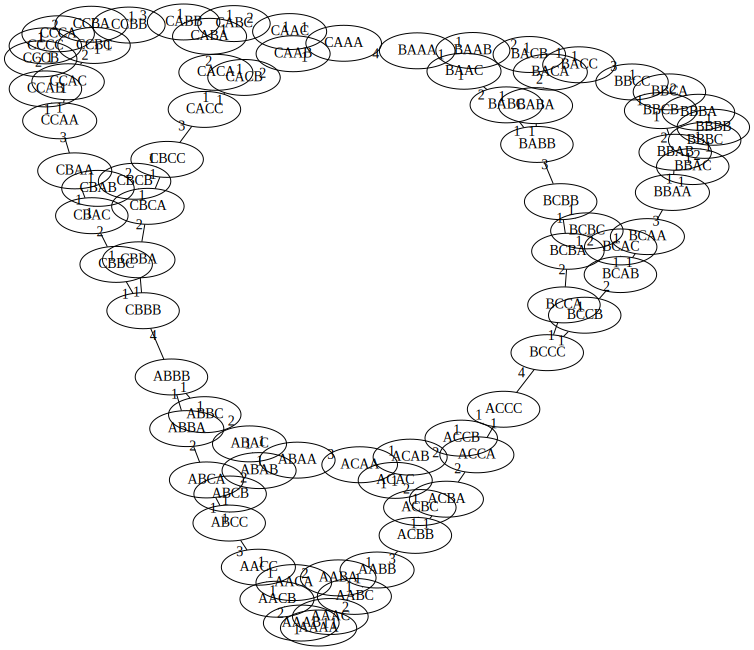

In [ ]:
h4 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(4,h4)
h4.format = 'svg'
svg = h4.pipe().decode('utf-8')
SVG(svg)

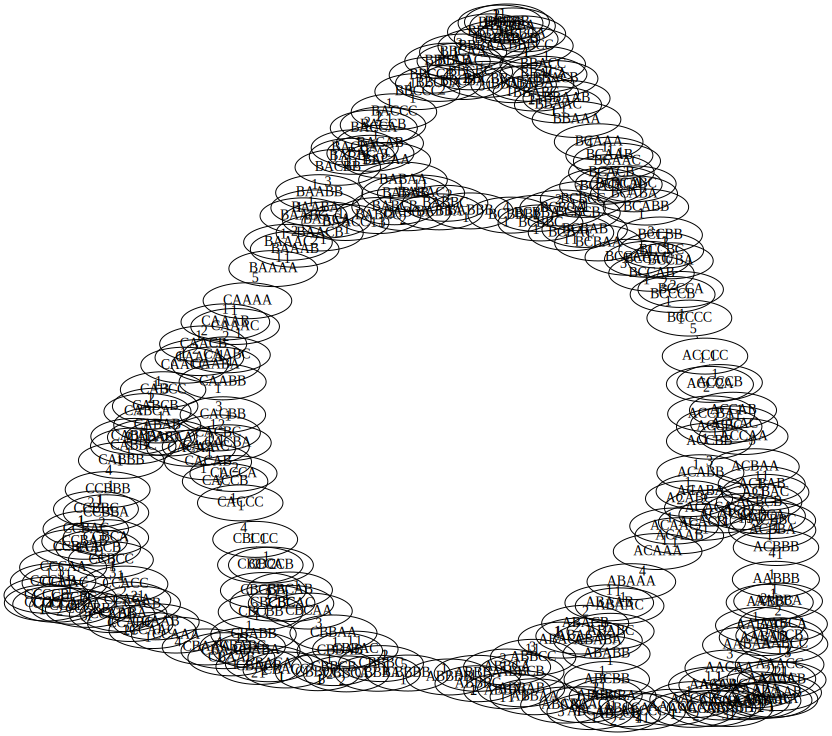

In [ ]:
h5 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(5,h5)
h5.format = 'svg'
svg = h5.pipe().decode('utf-8')
SVG(svg)

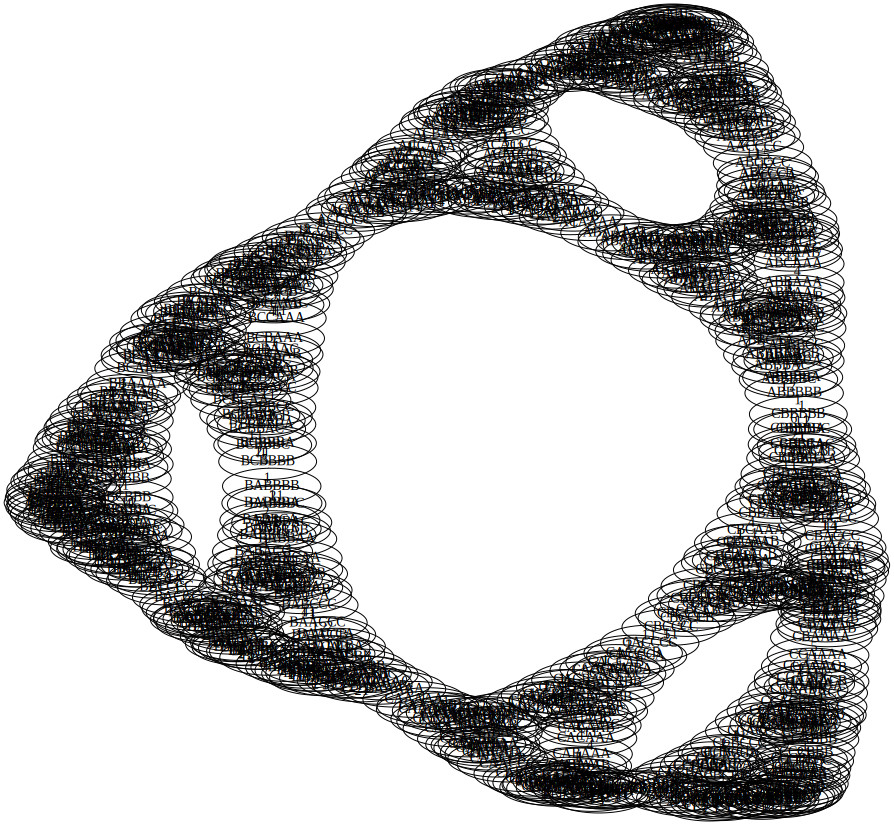

In [ ]:
h6 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(6,h6)
h6.format = 'svg'
svg = h6.pipe().decode('utf-8')
SVG(svg)

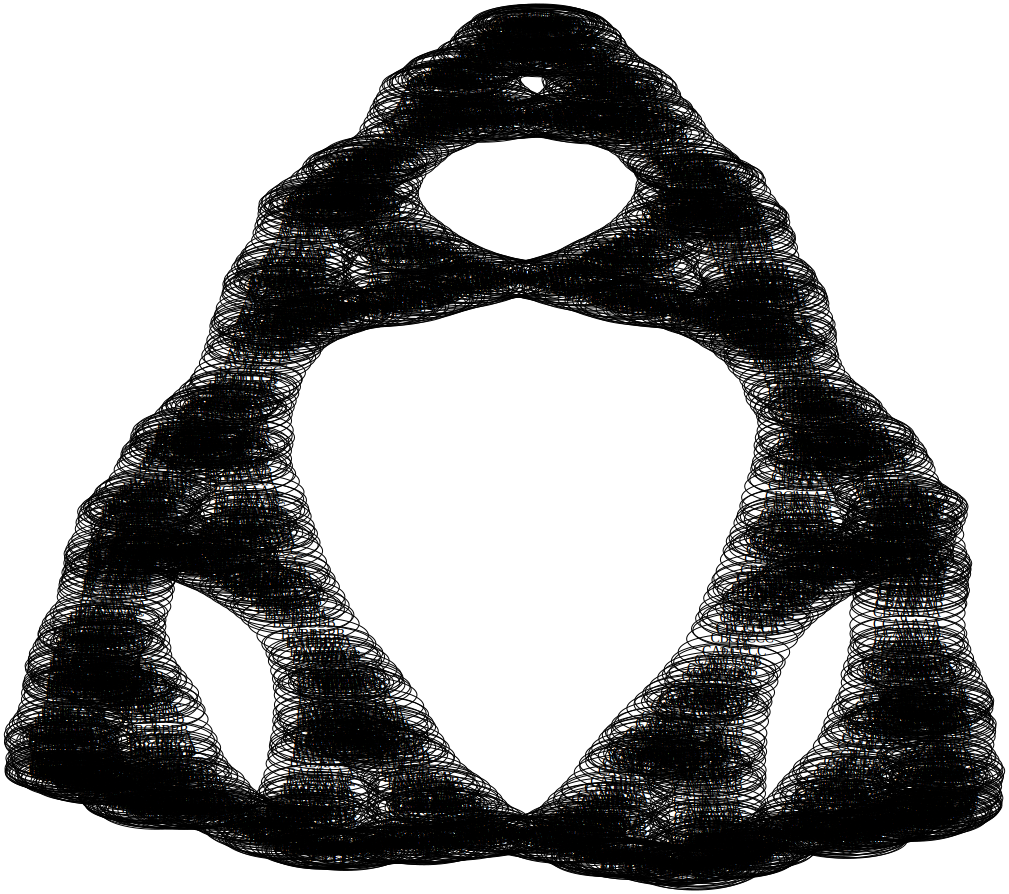

In [ ]:
h7 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(7,h7)
h7.format = 'svg'
svg = h7.pipe().decode('utf-8')
SVG(svg)

In [ ]:
h8 = graphviz.Graph(engine="sfdp")
hanoi_state_graph(8,h8)
h8.format = 'svg'
svg = h8.pipe().decode('utf-8')
SVG(svg)